In [49]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go

In [50]:
path = 'yeast.edgelist'
edgelist = pd.read_csv(path, delimiter=' ', header=None, names=['protein1', 'protein2'])

In [51]:
G = nx.from_pandas_edgelist(edgelist, 'protein1', 'protein2')

In [52]:
selected_nodes = random.sample(list(G.nodes()), 100)
subgraph = G.subgraph(selected_nodes).copy()

In [53]:
for node in selected_nodes:
    neighbors = list(G.neighbors(node))
    for neighbor in neighbors:
        if neighbor not in subgraph:
            subgraph.add_node(neighbor)
        subgraph.add_edge(node, neighbor)

if subgraph.number_of_edges() == 0:
    print("Eliga otro, no válido")
else:
    print(f"Tiene {subgraph.number_of_edges()} esquinas, el subgrafo.")

Tiene 110 esquinas, el subgrafo.


In [54]:
pos = nx.spring_layout(subgraph)  
edge_x = []
edge_y = []

In [55]:
for edge in subgraph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in subgraph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=[],
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
    )
)

node_adjacencies = []
node_text = []
for node in subgraph.nodes():
    adjacencies = len(list(subgraph.neighbors(node)))
    node_adjacencies.append(adjacencies)
    node_text.append(f'# of connections: {adjacencies}')
node_trace.marker.color = node_adjacencies
node_trace.text = node_text

The subgraph has 109 edges.


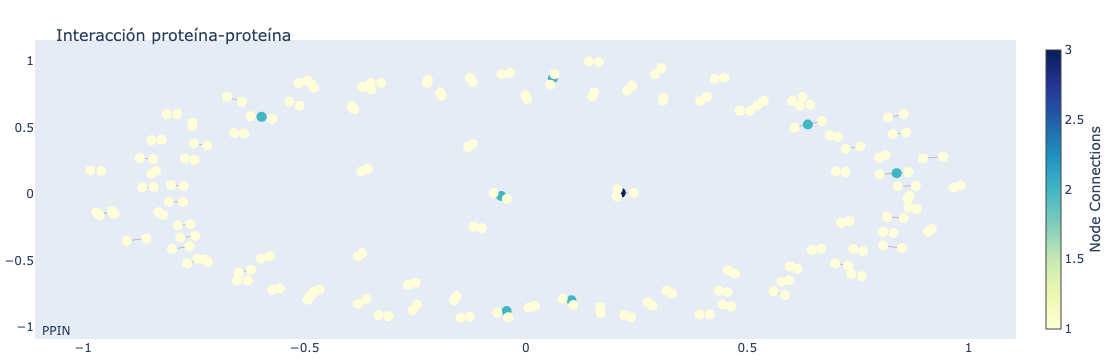

Nodos: 209
Esquinas: 109
Densidad: 0.005014722119985278
Diametro: inf


In [48]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Interacción proteína-proteína',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="PPIN",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()

El subgrafo  tiene 209 nodos y 109 aristas, pero la densidad es baja y el diámetro es infinito, lo que sugiere que el subgrafo no es completamente conectado. 
Contiene 209 proteínas distintas. Cada nodo en el grafo representa una proteína única en tu red de interacción. Hay 109 interacciones directas entre las proteínas.
La baja densidad y el diámetro infinito sugieren que la red está dispersa, con muchos nodos (proteínas) que tienen pocas conexiones (interacciones). Este tipo de estructura es común en redes biológicas, donde las interacciones suelen ser específicas y limitadas.
El hecho de que el diámetro sea infinito indica la presencia de múltiples componentes desconectadas dentro del subgrafo. En términos biológicos, esto puede reflejar que hay grupos de proteínas que interactúan entre sí pero no tienen interacciones con proteínas fuera de su grupo.
- Las proteínas pueden estar involucradas en funciones especializadas que requieren interacciones específicas con pocas otras proteínas.
- Las proteínas pueden estar organizadas en módulos funcionales, donde cada módulo representa un grupo de proteínas que colaboran en un proceso biológico específico.
- la falla de una proteína no necesariamente afecta a todo el sistema, sino solo a un módulo específico.